In [1]:
import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt

from CoGan import StateCOGAN

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
CLASSIFIER_MODEL_PATH = "./classifier_model.pt"
device =  torch.device("cuda" if torch.cuda.is_available() else "cpu")
state_classifier = torch.load(CLASSIFIER_MODEL_PATH)

In [3]:
SAVE_PATH = "./cogan_model.pt"
state_cogan = torch.load(SAVE_PATH)

In [9]:
z = torch.randn(2 , 128).to(state_cogan.device)

torch.Size([1, 32, 32])


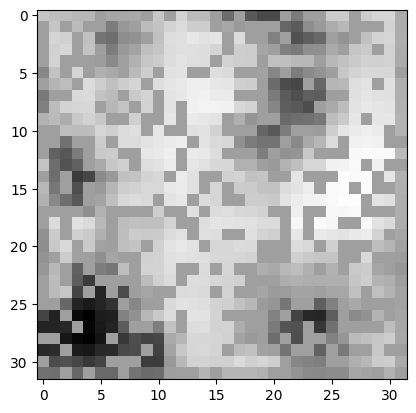

In [15]:
new_image = state_cogan.list_generator[0](z)[1]
print(new_image.shape)
plt.imshow(new_image.squeeze().cpu().detach().numpy() , cmap="gray")

In [7]:
print(state_cogan.list_generator[0])

Generator(
  (model): Sequential(
    (0): Linear(in_features=128, out_features=4096, bias=False)
    (1): LeakyReLU(negative_slope=0.2)
    (2): BatchNorm1d(4096, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Unflatten(dim=1, unflattened_size=(1, 256, 4, 4))
    (4): Upsample(size=(128, 8, 8), mode=nearest)
    (5): Squeeze()
    (6): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (7): LeakyReLU(negative_slope=0.2)
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): UnSqueeze()
    (10): Upsample(size=(64, 16, 16), mode=nearest)
    (11): Squeeze()
    (12): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (13): LeakyReLU(negative_slope=0.2)
    (14): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (15): UnSqueeze()
    (16): Upsample(size=(1, 32, 32), mode=nearest)
    (17): Squeeze()
    (18): Conv2d(1, 1,